## Linear Regression with K-fold and PCA

In [1]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')

df = housing.data.copy(deep=True)
df = df.astype({'Id':int})  # set data type of Id to int
df = df.set_index('Id')  # set Id column to be the index of the DataFrame
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [3]:
from IPython.display import display, Pretty
display(Pretty(housing.DESCR))

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [4]:
# add target variable 'sales price' to data df from housing object
df[housing.target_names[0]] = housing.target.tolist()
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Original DataFrame dimensions (+ SalesPrice)
print(f"{df.shape=}")

df.shape=(1460, 80)


In [7]:
# one hot encode categorical variables
import pandas as pd
numeric_variables = df.describe().columns.tolist()
nominative_variables = [x for x in df.columns.tolist() if x not in numeric_variables]

dummy_df = pd.get_dummies(df[nominative_variables])
print(dummy_df.shape)
dummy_df

(1460, 252)


,MSZoning_'C (all)',MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
5,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [8]:
# merge one-hot encoded columns with numeric columns
model_df = pd.concat([df[numeric_variables], dummy_df], axis=1) #.drop('SalePrice', axis=1)

# how many total coulmns now?
print(model_df.shape)
model_df

(1460, 289)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,True,False,False,False,False,True,False
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,True,False,False,False,False,True,False


In [9]:
# How many numerical columns now?
model_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Build regression model to predict sales price

#### Plot correlations and histograms of those columns
Reminder:
- What features should go in a model to predict high house price?
- What features are correlated with high house price?

#### Remove nulls from features

In [10]:
# which columns have the most nulls
model_df.isnull().sum().sort_values(ascending=False).head(5)

LotFrontage        259
GarageYrBlt         81
MasVnrArea           8
MSSubClass           0
BsmtExposure_Av      0
dtype: int64

In [11]:
# assume null means none - replace all nulls with zeros for lotFrontage and MasVnrArea
no_null_model_df = model_df
no_null_model_df['LotFrontage'] = no_null_model_df['LotFrontage'].fillna(0)
no_null_model_df['MasVnrArea'] = no_null_model_df['MasVnrArea'].fillna(0)

# GarageYrBlt 0 makes no sense - replace with mean
no_null_model_df['GarageYrBlt'] = no_null_model_df['GarageYrBlt'].fillna(no_null_model_df['GarageYrBlt'].mean())
no_null_model_df.isnull().sum().sort_values(ascending=False).head(5)

MSSubClass            0
Exterior1st_Stucco    0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
dtype: int64

### separate features from target

In [12]:
# define features and target
features = no_null_model_df.drop('SalePrice', axis=1)
features
target = no_null_model_df['SalePrice']

In [13]:
# confirm features do not contain target
[x for x in features.columns if x == 'SalePrice']

[]

### Establish Model Performance Baseline

#### How well does always guessing the mean do in terms of RMSE?

In [14]:
from math import sqrt

mean_sale_price = model_df.SalePrice.mean()
print(f"{mean_sale_price=:.2f}")

diffs = model_df.SalePrice - mean_sale_price
rse = (diffs * diffs).apply(sqrt)
baseline_rmse = rse.mean()
print(f'baseline rmse: {baseline_rmse:.2f}')

mean_sale_price=180921.20
baseline rmse: 57434.77


## Define function to fit and assess a Linear model

1. Set up splits/folds and array for stats.
- KFold(n_splits=n_splits) divides your dataset into n_splits (e.g., 5 or 10) folds.
- Each fold will act as a test set once, while the remaining folds are used for training.
- r2s, rmses, and train_rmses are arrays to store metrics for each fold.

2. loop through each fold
- kf.split(features, labels) returns indices for train/test splits.
- i keeps track of the current fold number.
- train_idx and test_idx are the row indices for training and testing data.

3. Split the features and labels
- If features is a pandas DataFrame, it uses .iloc to select rows.
- If features is a NumPy array (e.g., after PCA transformation), .iloc will fail and the except block selects rows using array indexing.

4. Scale the features
- Standardizes features by removing the mean and scaling to unit variance.
- Important: Scaling is fitted on the training set only and applied to both training and test sets. This avoids “data leakage.”

5. Train the linear model
- Fit a Linear Regression model using the training data.
- Predicts on the test set for evaluation.

6. Evaluate model performance
- r2_score: How well the model explains the variance in test labels.
- RMSE (Root Mean Squared Error): Measures the average prediction error in the same units as the target.
- Also calculates RMSE on the training set (train_rmses) to see if the model is overfitting.

In [15]:
from collections import defaultdict
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from typing import Tuple
from math import sqrt
import numpy as np


def run_linear_regression_with_kf(features: pd.DataFrame, labels: pd.Series,
                                    n_splits=5, title='logistic regression model'
                                   ) -> Tuple[float,float,float,float]:
    """
    scale, split, and model data. Return model performance statistics, plot confusion matrix
    feature: dataframe of feature columns to model
    labels: series of labels to model against
    test_size: fraction of labels to use in test split
    title: title for chart
    return: recall mean, recall sd, precision mean, precision sd
    """
    # set up splits/folds and array for stats.
    kf = KFold(n_splits=n_splits)
    r2s = np.zeros(n_splits)
    rmses = np.zeros(n_splits)
    train_rmses = np.zeros(n_splits)

    # fit model for each split/fold
    for i, (train_idx, test_idx) in enumerate(kf.split(X=features, y=labels)):
        # split features data for dataframes
        try:
            X_train = features.iloc[train_idx]
            y_train = labels.iloc[train_idx]
            X_test = features.iloc[test_idx]
            y_test = labels.iloc[test_idx]

        # or split features data for ndarrays (pca transformed features)
        except AttributeError:
            X_train = features[train_idx]
            y_train = labels.iloc[train_idx]
            X_test = features[test_idx]
            y_test = labels.iloc[test_idx]


        # scale all features to training features
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # fit model, evaluate
        regr = LinearRegression().fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        r2s[i] = r2_score(y_test, y_pred)
        rmses[i] = sqrt(mean_squared_error(y_test, y_pred))
        y_pred_train = regr.predict(X_train)
        train_rmses[i] = sqrt(mean_squared_error(y_train, y_pred_train))

    r2_mean = r2s.mean()
    r2_sd = r2s.std()
    rmse_mean = rmses.mean()
    rmse_sd = rmses.std()
    train_rmse_mean = train_rmses.mean()
    train_rmse_sd = train_rmses.std()

    # plot y_true vs y_pred
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(y_test, y_pred, alpha=0.3)
    ax.set_title(f'{title}\n' \
                 'mean r2: {:.2f},\n'\
                 'mean rmse {:.2f}'
                 .format(r2_mean, rmse_mean)
    )
    ax.set_xlabel('True Value')
    ax.set_ylabel('Predicted Value')
    stats = (r2_mean, rmse_mean, r2_sd, rmse_sd)
    train_test_errors = (rmse_mean, rmse_sd, train_rmse_mean, train_rmse_sd)
    model_data_and_pred = (regr, X_train, y_train, X_test, y_test, y_pred)
    fig_and_ax = (fig, ax)

    return stats, train_test_errors, model_data_and_pred, fig_and_ax

## fit a linear model with all features

In [16]:
# set kfold splits
n_splits = 3
# keep all model stats in one dict
all_stats = {}

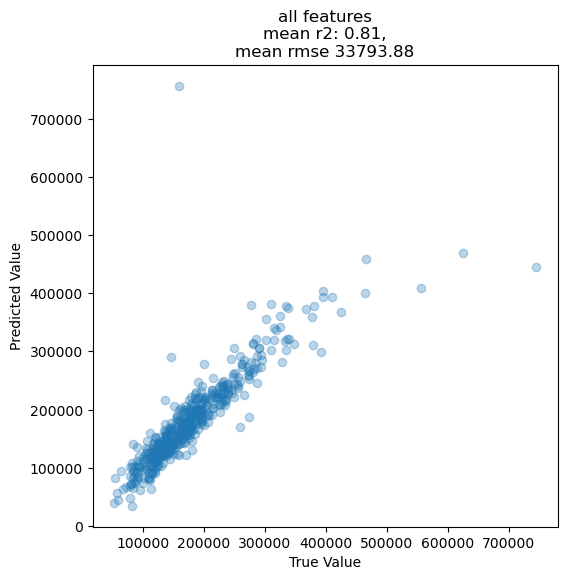

In [17]:
#r2_mean, rmse_mean, r2_sd, rmse_sd, regr, fig, ax =
plt.ion()
stats, train_test_errors, model_data_and_pred, fig_and_ax = run_linear_regression_with_kf(features=features, labels=target, n_splits=n_splits, title='all features')
all_stats['all'] = stats

### model has difficulty inferring with several very large outliers

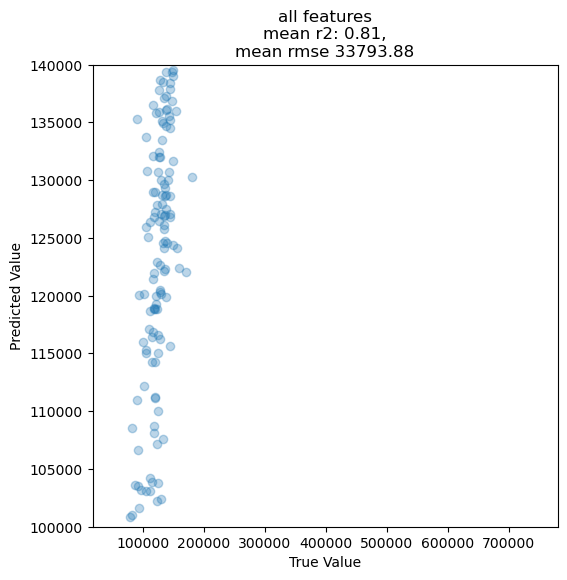

In [19]:
# plot ignoring outliers
fig, ax = fig_and_ax
ax.set_ylim(100000, 140000)
fig

### Overfitting - bias and variance

In [20]:
# the model is overfit
rmse_mean, rmse_sd, train_rmse_mean, train_rmse_sd = train_test_errors
print(f'test rmse ± sd: \t {rmse_mean} ± {rmse_sd}')
print(f'train rmse ± sd:\t {train_rmse_mean} ± {train_rmse_sd}')

test rmse ± sd: 	 33793.87748500591 ± 4975.541868909307
train rmse ± sd:	 19295.717390558315 ± 1329.8042814122377


### PCA all features to 100 dimensions

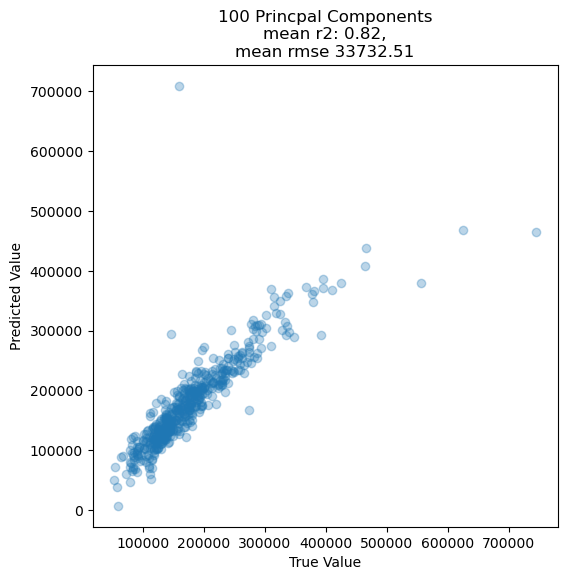

In [21]:
from sklearn.decomposition import PCA
n_components = 100
p = PCA(n_components=n_components )
features_pca = p.fit_transform(features)
stats, train_test_errors, model_data_and_pred, fig_and_ax = run_linear_regression_with_kf(features=features_pca, labels=target,
                                                title=f'{n_components} Princpal Components', n_splits=n_splits)

all_stats['all_pca'] = stats
# fewer dimensions - higher bias error?

### overfitting?

In [22]:
# the model is NOT overfit
rmse_mean, rmse_sd, train_rmse_mean, train_rmse_sd = train_test_errors
print(f'test rmse ± sd: \t {rmse_mean} ± {rmse_sd}')
print(f'train rmse ± sd:\t {train_rmse_mean} ± {train_rmse_sd}')

test rmse ± sd: 	 33732.51434194024 ± 3706.597658866305
train rmse ± sd:	 27546.153105995647 ± 1938.5549929652134


### Model Comparison

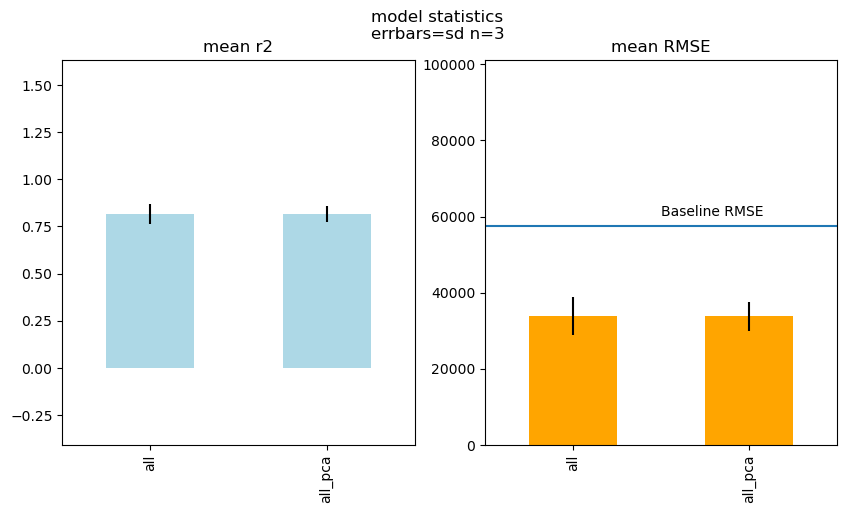

In [23]:
# create combined stats df
stats_df = pd.DataFrame.from_dict(all_stats).set_index(
    pd.Index(['r2_mean', 'rmse_mean', 'r2_sd', 'rmse_sd'], name='statistics')
)

# plot figures
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
stats_df.loc['r2_mean'].plot(ax=axs[0], kind='bar', yerr=stats_df.loc['r2_sd'], title='mean r2',  color='lightblue', ylim=(-stats_df.loc['r2_mean']['all_pca']/2, stats_df.loc['r2_mean']['all_pca']*2))
stats_df.loc['rmse_mean'].plot(ax=axs[1], kind='bar', yerr=stats_df.loc['rmse_sd'], title=f'mean RMSE',  color='orange', ylim=(0, stats_df.loc['rmse_mean']['all_pca']*3))

# plot baseline - guess mean every time RMSE
xmin, xmax = plt.xlim()
axs[1].hlines(baseline_rmse, xmin=xmin, xmax=xmax)
axs[1].text(xmax/3, baseline_rmse + baseline_rmse*0.05, 'Baseline RMSE')

# title and show
plt.suptitle(f'model statistics\nerrbars=sd n={n_splits}')
plt.show()


### Intuition:
PCA is a way to rotate the axes of your dataset around the data so that the axes line up with the directions of the greatest variation through the data.